# Name: Akshay Mali

### LetsGrowMore(LGM)

## Task 1

## Iris Flowers Classification ML Project💫✨

# Problem Statement

#### The Aim of our project is to build machine learning models to classify flower species into Setosa, Versicolour, and Virginica.

![Text](1.png)

# Dataset Information

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.<br>

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.<br>

# Attribute Information

### The columns in this dataset are:<br>

1. Id<br>
2. Sepal Length Cm<br>
3. Sepal Width Cm<br>
4. Petal Length Cm<br>
5. Petal Width Cm<br>
6. Species<br>

<H4>Target Variable</H4>

The target variable is 'species' which has three species of iris flowers: <b>Setosa, Versicolour, and Virginica.</b>

# Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from warnings import filterwarnings
filterwarnings('ignore')

In [66]:
plt.rcParams['figure.figsize'] = [15,8]

# Data Preprocessing

In [3]:
# load Iris Flower dataset
data = pd.read_csv('Iris.csv')

In [4]:
data.head() #first 5 observations

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.tail() #last 5 observations

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
data.info() #checking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<b>There are 5 numerical features and 1 categorical feature. </b>

In [7]:
data.isnull().sum() #checking the missing values if present

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<b>No missing values present</b>

## Removing unwanted column

In [8]:
data.drop("Id", axis=1, inplace = True)

# Data Visualization

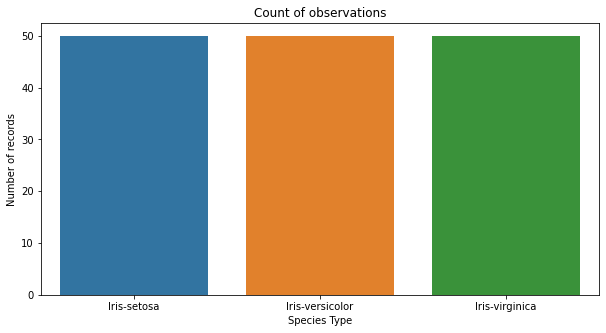

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data['Species'])
plt.xlabel('Species Type')
plt.ylabel('Number of records')
plt.title('Count of observations')
plt.show()

In [10]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<b>Interpretation: This chart tells us the number of records in each Species. All three have the same observations</b>

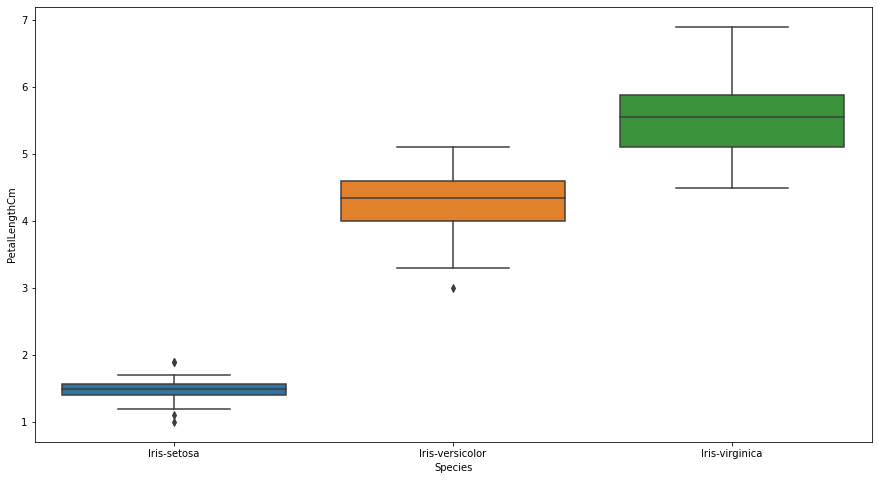

In [11]:
sns.boxplot(x='Species', y='PetalLengthCm', data=data)#boxplot
plt.show()

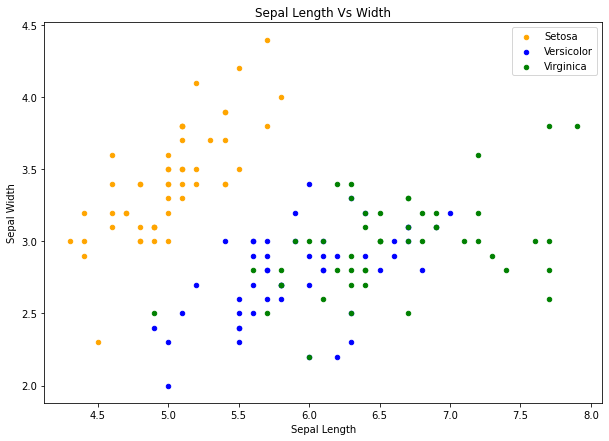

In [12]:
#sactter plot
fig = data[data.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
data[data.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
data[data.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

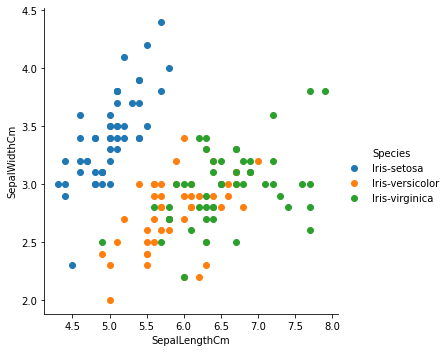

In [13]:
#seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(data, hue = 'Species', size=5) \
    .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
    .add_legend()
plt.show()

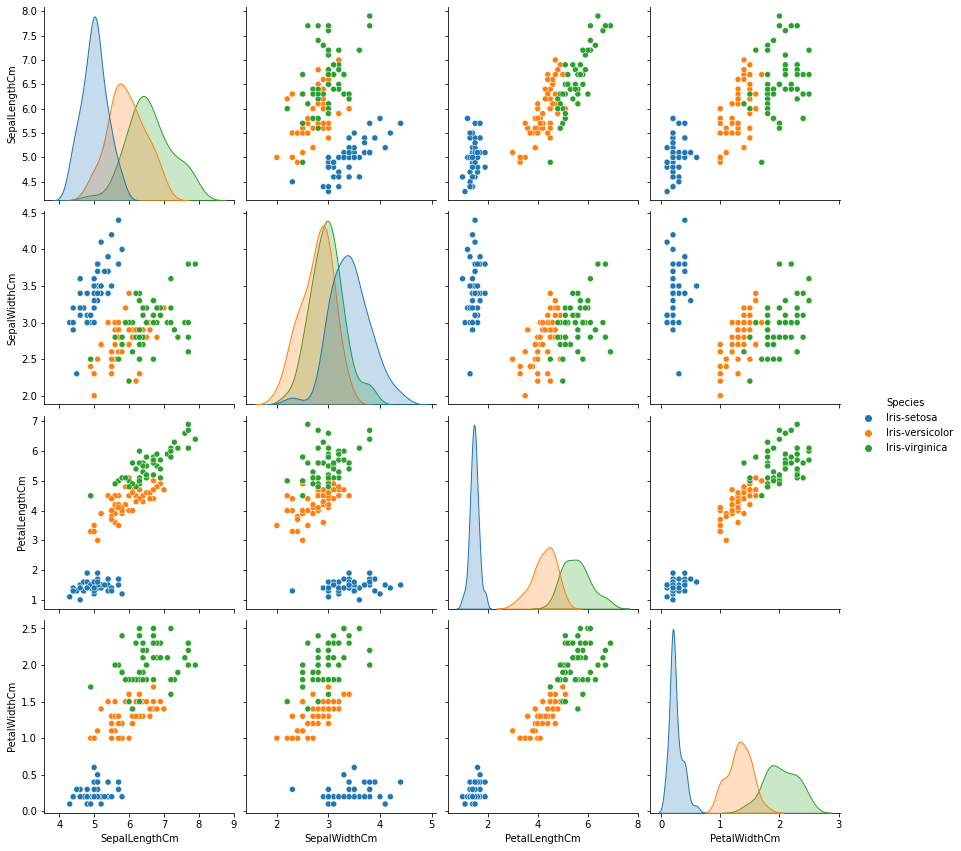

In [14]:
#pairplot
sns.pairplot(data, hue='Species', size=3)

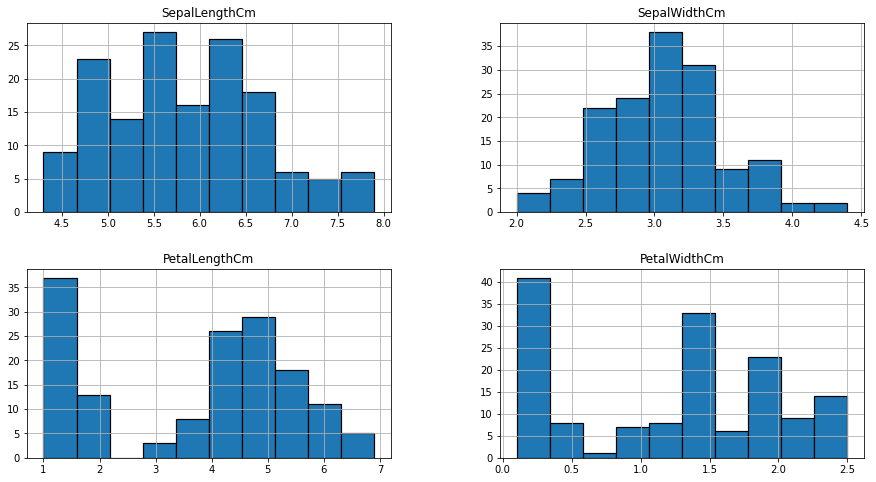

In [15]:
#histogram for the iris features
data.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
plt.show()

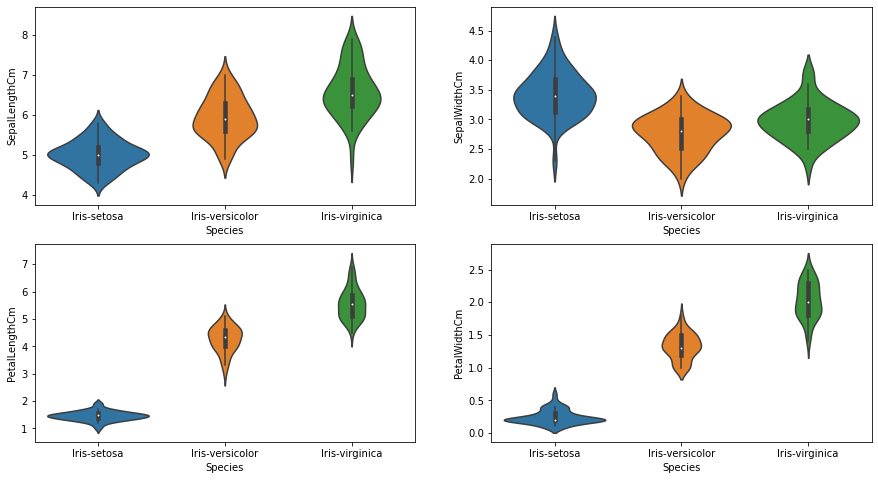

In [16]:
#violin plot for all the iris features species wise
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=data)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=data)
plt.show()

# Data Encoding

In [17]:
data1 = data.copy() #copy of the original dataset

In [18]:
data1['Species'].value_counts()#umber of species

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [19]:
# instantiate the encoder with the list of categories in the required order
orderencoding = OrdinalEncoder(categories = [["Iris-versicolor", "Iris-setosa", "Iris-virginica"]])

# add a column of ordered labels
# reshape(-1, 1): to rearrange the data
data1['Species'] = orderencoding.fit_transform(data1['Species'].values.reshape(-1,1))

# display the data
data1['Species'].value_counts()

0.0    50
2.0    50
1.0    50
Name: Species, dtype: int64

In [20]:
data1.head(2) #checking

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1.0
1,4.9,3.0,1.4,0.2,1.0


# Separating Predictor and Target Variables

In [21]:
df_features=data1.drop(columns = ['Species'],axis=1)#Predictor variable
df_features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
df_target = data1['Species']#Target Variables
df_target.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Species, dtype: float64

<h1>Model Building</h1>

<h2>Train Test Split</h2>

In [23]:
X = df_features
Y = df_target

In [24]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 100, test_size=0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (105, 4)
y_train (105,)
X_test (45, 4)
y_test (45,)


In [25]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

## Classification Algorithms

### 1. K Nearest Neighbour Classifier

In [26]:
# define the K nearest neighbours model
knc1 = KNeighborsClassifier(n_neighbors=3)

# train our K nearest neighbours model with the x and y training sets
knc1.fit(X_train,y_train)

# compute the performance measures on test data

test_report_knc = get_test_report(knc1.fit(X_train,y_train))

# print the performace measures
print(test_report_knc)

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       1.00      1.00      1.00        16
         2.0       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [27]:
# apply the model on unseen testing data

knc_preds = knc1.predict(X_test)

print("Accuracy of K-Nearest Neighbour Classifier:", metrics.accuracy_score(y_test, knc_preds))

Accuracy of K-Nearest Neighbour Classifier: 0.9777777777777777


In [28]:
confusion_matrix(y_test, knc_preds)

array([[11,  0,  0],
       [ 0, 16,  0],
       [ 1,  0, 17]], dtype=int64)

In [29]:
results1 = pd.DataFrame({
    'KNeighborsClassifier_Model_Type': ['Basic'],
    'Accuracy': [metrics.accuracy_score(y_test, knc_preds)*100],
     'Macro F-1 score':[metrics.f1_score(y_test, knc_preds,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test, knc_preds,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test, knc_preds,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test, knc_preds,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test, knc_preds,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test, knc_preds,average='weighted')]})
result_df1 = results1.sort_values(by=['Accuracy'], ascending=False)
result_df1 = result_df1.set_index('KNeighborsClassifier_Model_Type')
result_df1

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
KNeighborsClassifier_Model_Type,,,,,,,
Basic,97.777778,0.975983,0.977778,0.981481,0.977943,0.972222,0.97963


### 2. Decision Tree Classifier

In [30]:
# A. without flooring outliers

In [31]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(max_depth = 2, criterion = 'gini', random_state = 100)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train,y_train)

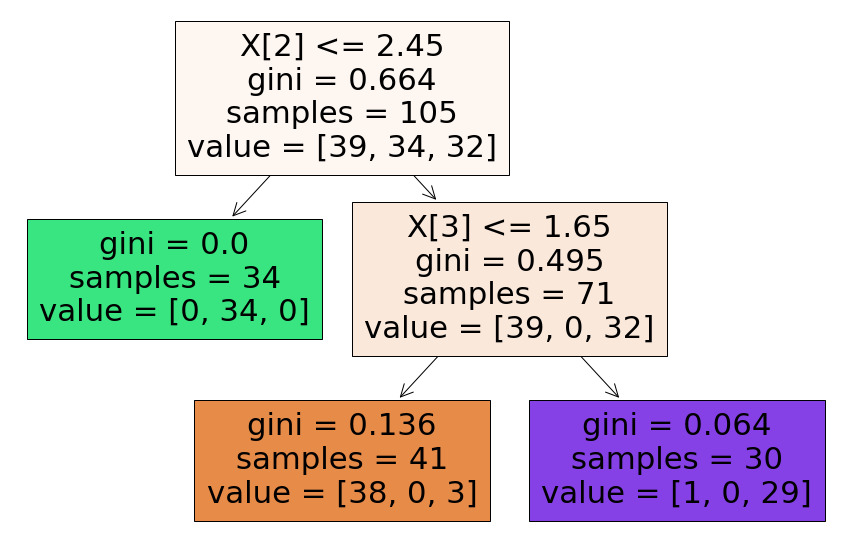

In [32]:
plt.figure(figsize=(15,10))

tree.plot_tree(decision_tree,filled=True)
plt.show()

In [33]:
# compute the performance measures on test data
# call the function 'get_test_report'

test_report_dt = get_test_report(decision_tree)

# print the performace measures
print(test_report_dt)

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       1.00      1.00      1.00        16
         2.0       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [34]:
# apply the model on unseen testing data
dt_preds = decision_tree_classification.predict(X_test)

print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test, dt_preds))

Accuracy of Random Forest Classifier: 0.9555555555555556


In [35]:
confusion_matrix(y_test, dt_preds)

array([[10,  0,  1],
       [ 0, 16,  0],
       [ 1,  0, 17]], dtype=int64)

In [36]:
results2 = pd.DataFrame({
    'DecisionTreeClassifier Model Type': ['Basic'],
    'Accuracy': [metrics.accuracy_score(y_test, dt_preds)*100],
     'Macro F-1 score':[metrics.f1_score(y_test, dt_preds,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test, dt_preds,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test, dt_preds,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test, dt_preds,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test, dt_preds,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test, dt_preds,average='weighted')]})
result_df2 = results2.sort_values(by='Accuracy', ascending=False)
result_df2 = result_df2.set_index('DecisionTreeClassifier Model Type')
result_df2

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
DecisionTreeClassifier Model Type,,,,,,,
Basic,95.555556,0.951178,0.955556,0.951178,0.955556,0.951178,0.955556


###  3. Gaussian Naive Bayes Classifier

In [37]:
# define our gaussian naive bayes model
gnc = GaussianNB()

# fit our model with training x and y data
gnc.fit(X_train,y_train)

# compute the performance measures on test data
# call the function 'get_test_report'
test_report_gnc = get_test_report(gnc.fit(X_train,y_train))

# print the performace measures
print(test_report_gnc)

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       1.00      1.00      1.00        16
         2.0       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [38]:
# apply the model on unseen testing data
gnc_preds = gnc.predict(X_test)

print("Accuracy of Gaussian Naive Bayes Classifier:", metrics.accuracy_score(y_test, gnc_preds))

Accuracy of Gaussian Naive Bayes Classifier: 0.9555555555555556


In [39]:
confusion_matrix(y_test, gnc_preds)

array([[10,  0,  1],
       [ 0, 16,  0],
       [ 1,  0, 17]], dtype=int64)

In [40]:
results3 = pd.DataFrame({
    'Gaussian Naive Bayes Classifier Model Type': ['Basic'],
    'Accuracy': [metrics.accuracy_score(y_test, gnc_preds)*100],
     'Macro F-1 score':[metrics.f1_score(y_test, gnc_preds,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test, gnc_preds,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test, gnc_preds,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test, gnc_preds,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test, gnc_preds,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test, gnc_preds,average='weighted')]})
result_df3 = results3.sort_values(by='Accuracy', ascending=False)
result_df3 = result_df3.set_index('Gaussian Naive Bayes Classifier Model Type')
result_df3

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
Gaussian Naive Bayes Classifier Model Type,,,,,,,
Basic,95.555556,0.951178,0.955556,0.951178,0.955556,0.951178,0.955556


In [41]:
results_final_cl = pd.DataFrame({
    'Model Type': ['Basic'],
    'KNeighborsClassifier Accuracy':[metrics.accuracy_score(y_test, knc_preds)*100],
    'DecisionTreeClassifier Accuracy': [metrics.accuracy_score(y_test, dt_preds)*100],
    'GaussianNaiveBayes Classifier Accuracy': [metrics.accuracy_score(y_test, gnc_preds)*100]})
results_final_cl_df = results_final_cl.sort_values(by=['KNeighborsClassifier Accuracy','DecisionTreeClassifier Accuracy'], ascending=False)
results_final_cl_df = results_final_cl_df.set_index('Model Type')
results_final_cl_df

,KNeighborsClassifier Accuracy,DecisionTreeClassifier Accuracy,GaussianNaiveBayes Classifier Accuracy
Model Type,,,
Basic,97.777778,95.555556,95.555556


## Bagging

### Random Forest Classifier

In [42]:
# define our random forest classifier
rfc = RandomForestClassifier()

# train the model using the x and y training sets
rfc.fit(X_train,y_train)

# compute the performance measures on test data
# call the function 'get_test_report'
test_report_rfc = get_test_report(rfc.fit(X_train,y_train))

# print the performace measures
print(test_report_rfc)

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       1.00      1.00      1.00        16
         2.0       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [43]:
# apply the model on unseen testing data
rfc_preds = rfc.predict(X_test)

print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test, rfc_preds))

Accuracy of Random Forest Classifier: 0.9555555555555556


In [44]:
confusion_matrix(y_test, rfc_preds)

array([[10,  0,  1],
       [ 0, 16,  0],
       [ 1,  0, 17]], dtype=int64)

In [45]:
results4 = pd.DataFrame({
    'RandomForestClassifier Model Type': ['Basic'],
    'Accuracy': [metrics.accuracy_score(y_test, rfc_preds)*100],
     'Macro F-1 score':[metrics.f1_score(y_test, rfc_preds,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test, rfc_preds,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test, rfc_preds,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test, rfc_preds,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test, rfc_preds,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test, rfc_preds,average='weighted')]})
result_df4 = results4.sort_values(by='Accuracy', ascending=False)
result_df4 = result_df4.set_index('RandomForestClassifier Model Type')
result_df4

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
RandomForestClassifier Model Type,,,,,,,
Basic,95.555556,0.951178,0.955556,0.951178,0.955556,0.951178,0.955556


## Boosting

### AdaBoost classifier

In [46]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
AdaBoost=ada_model.fit(X_train,y_train)

In [47]:
Ada_preds = AdaBoost.predict(X_test)

In [48]:
print(classification_report(y_test, Ada_preds))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       1.00      1.00      1.00        16
         2.0       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [49]:
print("Accuracy of AdaBoost Classifier :", metrics.accuracy_score(y_test, Ada_preds)*100,'%')

Accuracy of AdaBoost Classifier : 95.55555555555556 %


In [50]:
confusion_matrix(y_test, Ada_preds)

array([[10,  0,  1],
       [ 0, 16,  0],
       [ 1,  0, 17]], dtype=int64)

In [51]:
results5 = pd.DataFrame({
    'AdaBoost classifier Model Type': ['Basic'],
    'Accuracy': [metrics.accuracy_score(y_test, Ada_preds)*100],
     'Macro F-1 score':[metrics.f1_score(y_test, Ada_preds,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test, Ada_preds,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test, Ada_preds,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test, Ada_preds,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test, Ada_preds,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test, Ada_preds,average='weighted')]})
result_df5 = results5.sort_values(by='Accuracy', ascending=False)
result_df5 = result_df5.set_index('AdaBoost classifier Model Type')
result_df5

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
AdaBoost classifier Model Type,,,,,,,
Basic,95.555556,0.951178,0.955556,0.951178,0.955556,0.951178,0.955556


### Gradient Boosting classifier

In [52]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 5, random_state = 10)

# fit the model using fit() on train data
GradientBoosting=gboost_model.fit(X_train,y_train)

In [53]:
gb_preds = GradientBoosting.predict(X_test)

In [54]:
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        11
         1.0       1.00      1.00      1.00        16
         2.0       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [55]:
print("Accuracy of Gradient Boosting Classifier :", metrics.accuracy_score(y_test, gb_preds)*100,'%')

Accuracy of Gradient Boosting Classifier : 95.55555555555556 %


In [56]:
confusion_matrix(y_test, gb_preds)

array([[10,  0,  1],
       [ 0, 16,  0],
       [ 1,  0, 17]], dtype=int64)

In [57]:
results6 = pd.DataFrame({
    'Gradient Boosting Model Type': ['Basic'],
    'Accuracy': [metrics.accuracy_score(y_test, gb_preds)*100],
     'Macro F-1 score':[metrics.f1_score(y_test, gb_preds,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test, gb_preds,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test, gb_preds,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test, gb_preds,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test, gb_preds,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test, gb_preds,average='weighted')]})
result_df6 = results6.sort_values(by='Accuracy', ascending=False)
result_df6 = result_df6.set_index('Gradient Boosting Model Type')
result_df6

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
Gradient Boosting Model Type,,,,,,,
Basic,95.555556,0.951178,0.955556,0.951178,0.955556,0.951178,0.955556


### XGBoost (eXtreme Gradient Boost) Classifier

In [58]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train,y_train)

[17:18:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report_xgb = get_test_report(xgb_model)

# print the performance measures
print(test_report_xgb)

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       1.00      1.00      1.00        16
         2.0       0.95      1.00      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [60]:
y_pred_xgb =xgb_model.predict(X_test)
print("Accuracy of XGBClassifier = ", metrics.accuracy_score(y_test,y_pred_xgb))

Accuracy of XGBClassifier =  0.9777777777777777


In [61]:
confusion_matrix(y_test,y_pred_xgb)

array([[10,  0,  1],
       [ 0, 16,  0],
       [ 0,  0, 18]], dtype=int64)

In [62]:
results4 = pd.DataFrame({
    'XGBClassifier Model Type': ['Basic'],
    'Accuracy': [metrics.accuracy_score(y_test,y_pred_xgb)*100],
     'Macro F-1 score':[metrics.f1_score(y_test,y_pred_xgb,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test,y_pred_xgb,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test,y_pred_xgb,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test,y_pred_xgb,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test,y_pred_xgb,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test,y_pred_xgb,average='weighted')]})
result_df4 = results4.sort_values(by='Accuracy', ascending=False)
result_df4 = result_df4.set_index('XGBClassifier Model Type')
result_df4

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
XGBClassifier Model Type,,,,,,,
Basic,97.777778,0.975118,0.977778,0.969697,0.977549,0.982456,0.978947


In [63]:
#------------------------------------------------------------------------END---------------------------------------#